## 0. 필요한 라이브러리 import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 살펴보기
pandas의 read_csv 함수를 사용해 데이터를 읽어오고, 연도별 어떤 변수들이 있는지 살펴보겠습니다.

In [2]:
df_2015 = pd.read_csv('Data/2015.csv')
print('2015', df_2015)
print()
df_2016 = pd.read_csv('Data/2016.csv')
print('2016', df_2016)
print()
df_2017 = pd.read_csv('Data/2017.csv')
print('2017', df_2017)
print()
df_2018 = pd.read_csv('Data/2018.csv')
print('2018', df_2018)
print()
df_2019 = pd.read_csv('Data/2019.csv')
print('2019', df_2019)
print()

2015          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7

## 2. Data 전처리 
### Features 정리
연도별 Data간 Feature의 갯수, 종류 및 이름이 다르므로 정리

In [3]:
df_2015.rename(columns = {'Happiness Rank':'Rank','Happiness Score':'Score', 'Economy (GDP per Capita)':'GDP', 'Family':'Social Support', 'Health (Life Expectancy)':'Healthy Life Expectancy', 'Trust (Government Corruption)':'Corruption'},inplace=True)
df_2016.rename(columns = {'Happiness Rank':'Rank','Happiness Score':'Score', 'Lower Confidence Interval':'LCI', 'Upper Confidence Interval':'UCI', 'Economy (GDP per Capita)':'GDP', 'Family':'Social Support', 'Health (Life Expectancy)':'Healthy Life Expectancy', 'Trust (Government Corruption)':'Corruption'},inplace=True)
df_2017.rename(columns = {'Happiness.Rank':'Rank','Happiness.Score':'Score', 'Economy..GDP.per.Capita.':'GDP', 'Family':'Social Support', 'Health..Life.Expectancy.':'Healthy Life Expectancy', 'Trust..Government.Corruption.':'Corruption', 'Dystopia.Residual':'Dystopia Residual', 'Whisker.low':'LCI', 'Whisker.high':'UCI'},inplace=True)
df_2018.rename(columns = {'Country or region':'Country','Overall rank':'Rank', 'GDP per capita':'GDP', 'Freedom to make life choices':'Freedom','Social support':'Social Support', 'Healthy life expectancy':'Healthy Life Expectancy', 'Perceptions of corruption':'Corruption'},inplace=True)
df_2019.rename(columns = {'Country or region':'Country','Overall rank':'Rank', 'GDP per capita':'GDP', 'Freedom to make life choices':'Freedom','Social support':'Social Support', 'Healthy life expectancy':'Healthy Life Expectancy', 'Perceptions of corruption':'Corruption'},inplace=True)

2015, 2016년도 자료에 있는 Region이 2017, 2018, 2019년도에 없어 추가

In [4]:
# 2018, 2019년도 "Country or region"을 "Country"로 변경
df_2018.rename(columns = {"Country or region" : "Country"}, inplace=True)
df_2019.rename(columns = {"Country or region" : "Country"}, inplace=True)

# 2017, 2018, 2019년도에 "Region" column 추가
df_2017.insert(1, 'Region', '-')
df_2018.insert(1, 'Region', '-')
df_2019.insert(1, 'Region', '-')

각 Country별 2015 또는 2016년도에서 Region을 읽어와서 2017, 2018, 2019년도 Region에 입력

In [5]:
# 2015, 2016년도의 Country및 Region을 Dictionary로 만든다.
region_2015 = {}
region_2016 = {}
for i in range(len(df_2015)):
    region_2015[df_2015['Country'][i]] = df_2015['Region'][i]
for i in range(len(df_2016)):
    region_2016[df_2016['Country'][i]] = df_2016['Region'][i]

# region_2015와 region_2016의 합집합을 구하여 region_2015_2016을 만든다.
region_2015_2016 = region_2015 | region_2016

# 2017, 2018, 2019년도 Region data update
for i in range(len(df_2017)):
    if df_2017['Country'][i] in region_2015_2016:
        df_2017['Region'][i] = region_2015_2016[df_2017['Country'][i]]

for i in range(len(df_2018)):
    if df_2018['Country'][i] in region_2015_2016:
        df_2018['Region'][i] = region_2015_2016[df_2018['Country'][i]]

for i in range(len(df_2019)):
    if df_2019['Country'][i] in region_2015_2016:
        df_2019['Region'][i] = region_2015_2016[df_2019['Country'][i]]

print('2015', df_2015)
print('2016', df_2016)
print('2017', df_2017)
print('2018', df_2018)
print('2019', df_2019)

df_2017.to_csv('2017_with_regions.csv', index=False)
df_2018.to_csv('2018_with_regions.csv', index=False)
df_2019.to_csv('2019_with_regions.csv', index=False)

2015          Country                           Region  Rank  Score  \
0    Switzerland                   Western Europe     1  7.587   
1        Iceland                   Western Europe     2  7.561   
2        Denmark                   Western Europe     3  7.527   
3         Norway                   Western Europe     4  7.522   
4         Canada                    North America     5  7.427   
..           ...                              ...   ...    ...   
153       Rwanda               Sub-Saharan Africa   154  3.465   
154        Benin               Sub-Saharan Africa   155  3.340   
155        Syria  Middle East and Northern Africa   156  3.006   
156      Burundi               Sub-Saharan Africa   157  2.905   
157         Togo               Sub-Saharan Africa   158  2.839   

     Standard Error      GDP  Social Support  Healthy Life Expectancy  \
0           0.03411  1.39651         1.34951                  0.94143   
1           0.04884  1.30232         1.40223            

### 결측치 확인
먼저 데이터에 결측치가 있는지를 확인하겠습니다.<br>
missingno 라이브러리의 matrix 함수를 사용하면, 데이터의 결측 상태를 시각화를 통해 살펴볼 수 있습니다.

In [6]:
df_2019.head()

,Rank,Region,Country,Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption
0,1,Western Europe,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Western Europe,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Western Europe,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Western Europe,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Western Europe,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<AxesSubplot:>

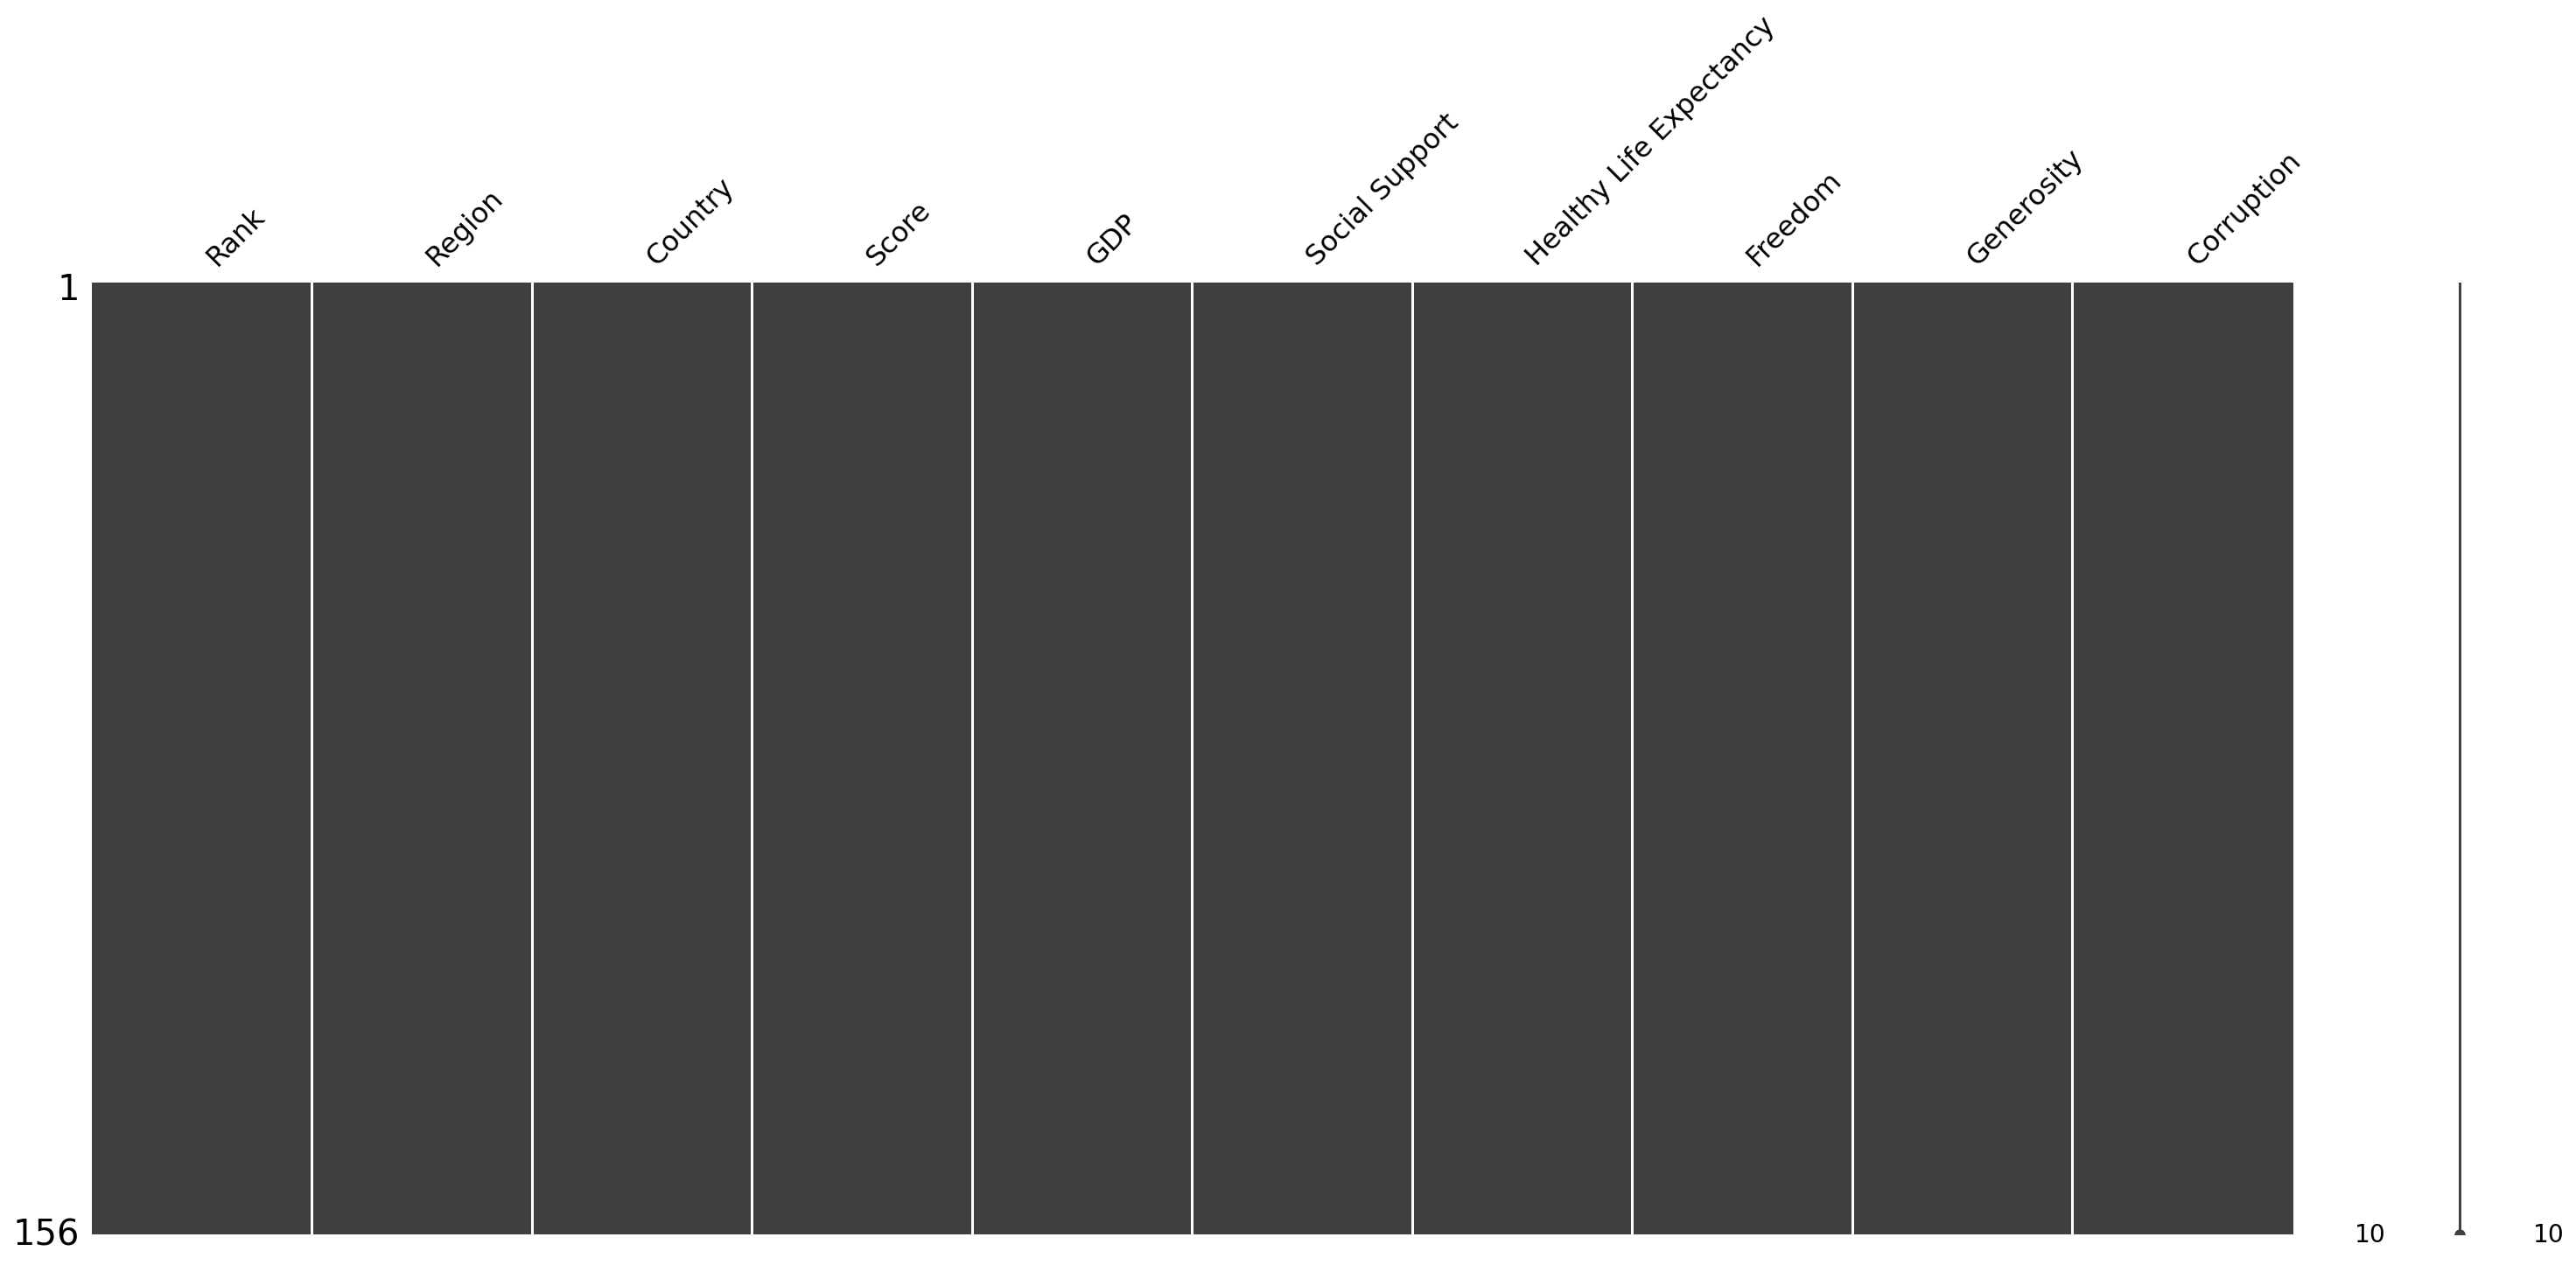

In [7]:
msno.matrix(df_2019)

모든 변수에 결측치가 없는 것으로 보이지만, 혹시 모르니 확실하게 살펴보겠습니다.<br>

In [8]:
for c in df_2019.columns:
    print('{} : {}'.format(c, len(df_2019.loc[pd.isnull(df_2019[c]), c].values)))

Rank : 0
Region : 0
Country : 0
Score : 0
GDP : 0
Social Support : 0
Healthy Life Expectancy : 0
Freedom : 0
Generosity : 0
Corruption : 0


In [9]:
df_2019.head()

,Rank,Region,Country,Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption
0,1,Western Europe,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Western Europe,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Western Europe,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Western Europe,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Western Europe,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### 각 요소들의 행복지수에 대한 상관관계 시각화
각 요소들이 행복지수에 얼마나 영향을 미치는지 시각화하여 확인

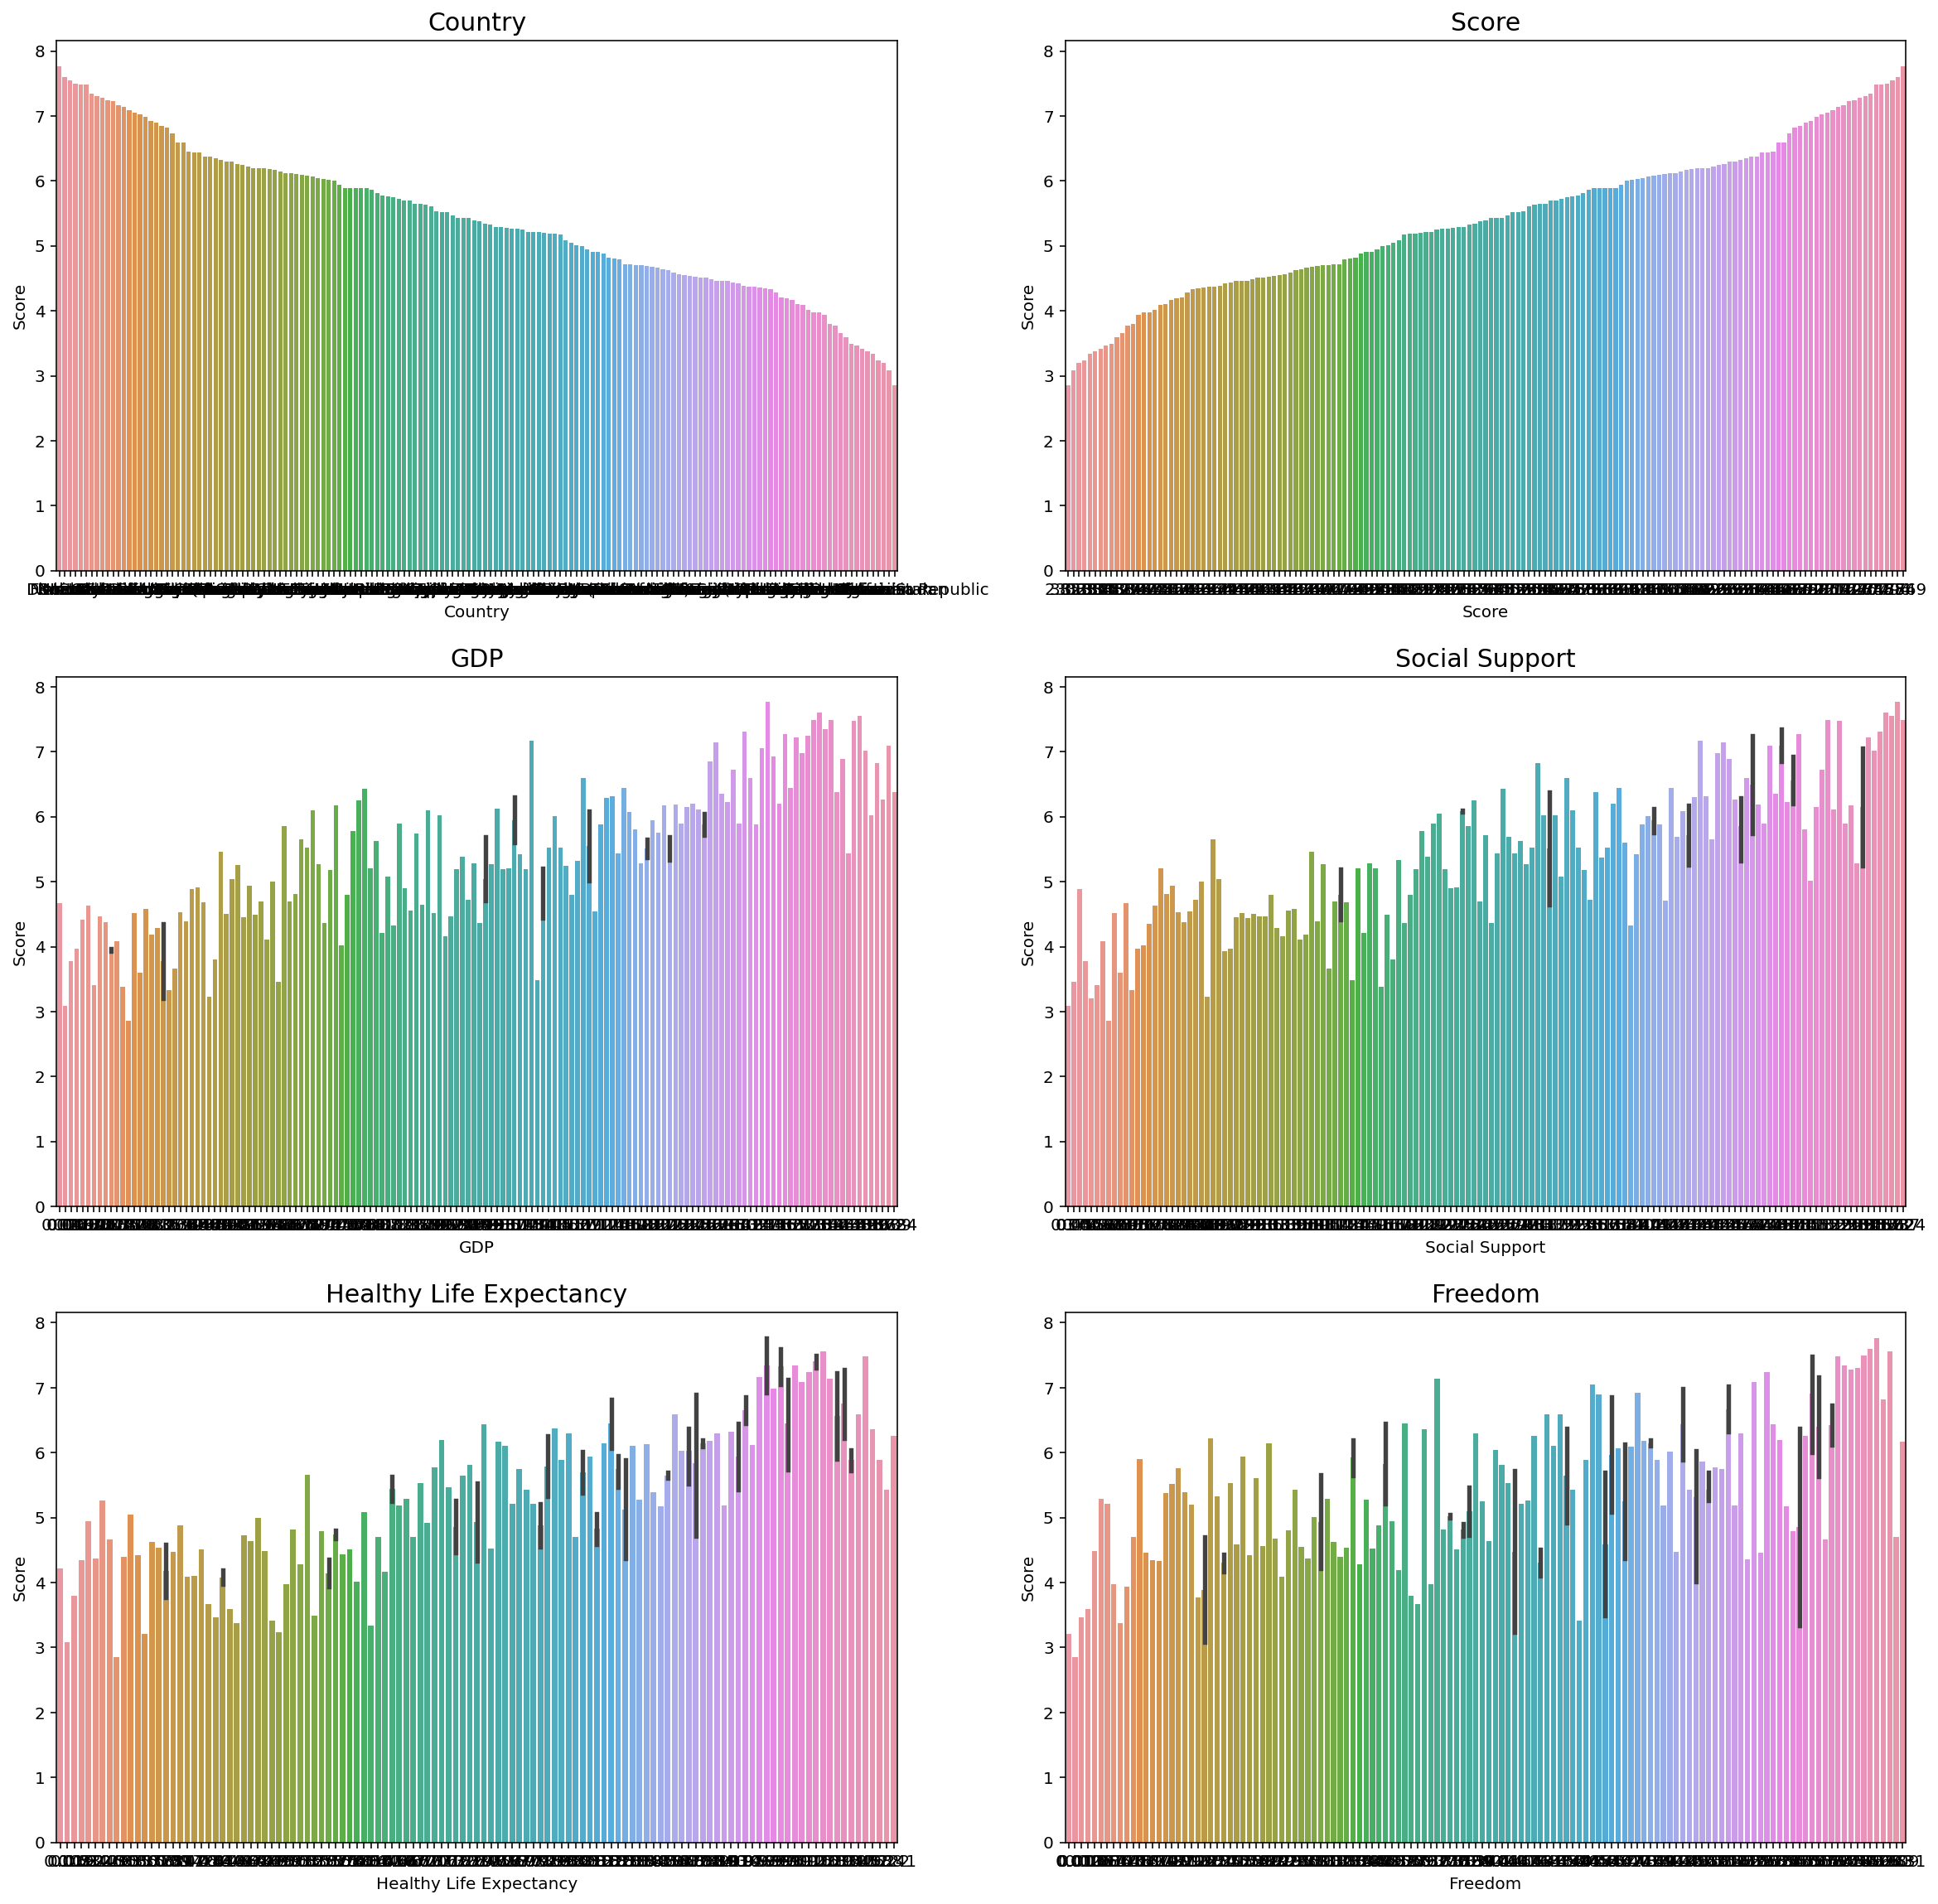

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Country 변수는 제외하고 시각화합니다.
count = 2
columns = df_2019.columns
for row in range(3):
    for col in range(2):
        if count == 8:
            break
        sns.barplot(data=df_2019, x=columns[count], y='Score', ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1


GDP per capita,	Social support,	Healthy life expectancy, Freedom to make life choices는 값이 증가함에 따라 행복도도 올라가는 경향을 보이나 Generosity와 Perceptions of corruption의 경우 큰 상관관계가 없어보인다.

### 각 Region별 행복지수 비교 시각화

In [11]:
# 우선 지역구분및 지역별 국가수 확인
df_Region2015 = df_2015.groupby('Region').size()
print('2015', df_Region2015)
df_Region2016 = df_2016.groupby('Region').size()
print('2016', df_Region2016)
df_Region2017 = df_2017.groupby('Region').size()
print('2017', df_Region2017)
df_Region2018 = df_2018.groupby('Region').size()
print('2018', df_Region2018)
df_Region2019 = df_2019.groupby('Region').size()
print('2019', df_Region2019)

2015 Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64
2016 Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        24
Middle East and Northern Africa    19
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 38
Western Europe                     21
dtype: int64
2017 Region
-                                   2
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        4
Latin America and Caribbea

2017년, 2018년에 각각 2개국가, 2019년에 4개국가가 Region data가 없다.

In [12]:
# Region이 확인되지 않은 국가 확인
for i in range(len(df_2017)):
    if df_2017['Region'][i] == '-':
        print(df_2017['Country'][i])
print()

for i in range(len(df_2018)):
    if df_2018['Region'][i] == '-':
        print(df_2018['Country'][i])
print()
        
for i in range(len(df_2019)):
    if df_2019['Region'][i] == '-':
        print(df_2019['Country'][i])

Taiwan Province of China
Hong Kong S.A.R., China

Trinidad & Tobago
Northern Cyprus

Trinidad & Tobago
Northern Cyprus
North Macedonia
Gambia


In [13]:
# Region이 확인되지 않은 국가의 Region을 수동으로 입력
for i in range(len(df_2017)):
    if df_2017['Country'][i] == 'Taiwan Province of China':
        df_2017['Region'][i] = 'Eastern Asia'
    elif df_2017['Country'][i] == 'Hong Kong S.A.R., China':
        df_2017['Region'][i] = 'Eastern Asia'

for i in range(len(df_2018)):
    if df_2018['Country'][i] == 'Trinidad & Tobago':
        df_2018['Region'][i] = 'Latin America and Caribbean'
    elif df_2018['Country'][i] == 'Northern Cyprus':
        df_2018['Region'][i] = 'Central and Eastern Europe'

for i in range(len(df_2019)):
    if df_2019['Country'][i] == 'Trinidad & Tobago':
        df_2019['Region'][i] = 'Latin America and Caribbean'
    elif df_2019['Country'][i] == 'Northern Cyprus':
        df_2019['Region'][i] = 'Central and Eastern Europe'
    elif df_2019['Country'][i] == 'North Macedonia':
        df_2019['Region'][i] = 'Central and Eastern Europe'
    elif df_2019['Country'][i] == 'Gambia':
        df_2019['Region'][i] = 'Sub-Saharan Africa'

In [14]:
# 지역구분및 지역별 국가수 다시 확인
df_Region2015 = df_2015.groupby('Region').size()
df_Region2015 = df_Region2015.to_frame().reset_index()
df_Region2015.columns = ['Region', 'count']
print('2015', df_Region2015)
print()

df_Region2016 = df_2016.groupby('Region').size()
df_Region2016 = df_Region2016.to_frame().reset_index()
df_Region2016.columns = ['Region', 'count']
print('2016', df_Region2016)
print()

df_Region2017 = df_2017.groupby('Region').size()
df_Region2017 = df_Region2017.to_frame().reset_index()
df_Region2017.columns = ['Region', 'count']
print('2017', df_Region2017)
print()

df_Region2018 = df_2018.groupby('Region').size()
df_Region2018 = df_Region2018.to_frame().reset_index()
df_Region2018.columns = ['Region', 'count']
print('2018', df_Region2018)
print()

df_Region2019 = df_2019.groupby('Region').size()
df_Region2019 = df_Region2019.to_frame().reset_index()
df_Region2019.columns = ['Region', 'count']
print('2019', df_Region2019)

2015                             Region  count
0        Australia and New Zealand      2
1       Central and Eastern Europe     29
2                     Eastern Asia      6
3      Latin America and Caribbean     22
4  Middle East and Northern Africa     20
5                    North America      2
6                Southeastern Asia      9
7                    Southern Asia      7
8               Sub-Saharan Africa     40
9                   Western Europe     21

2016                             Region  count
0        Australia and New Zealand      2
1       Central and Eastern Europe     29
2                     Eastern Asia      6
3      Latin America and Caribbean     24
4  Middle East and Northern Africa     19
5                    North America      2
6                Southeastern Asia      9
7                    Southern Asia      7
8               Sub-Saharan Africa     38
9                   Western Europe     21

2017                             Region  count
0        Australi

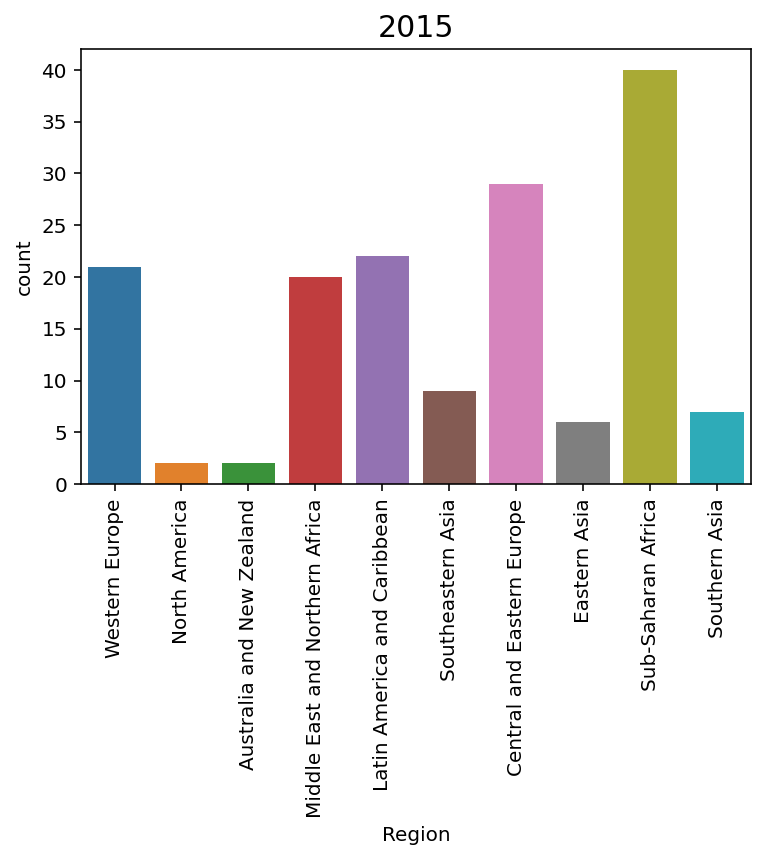

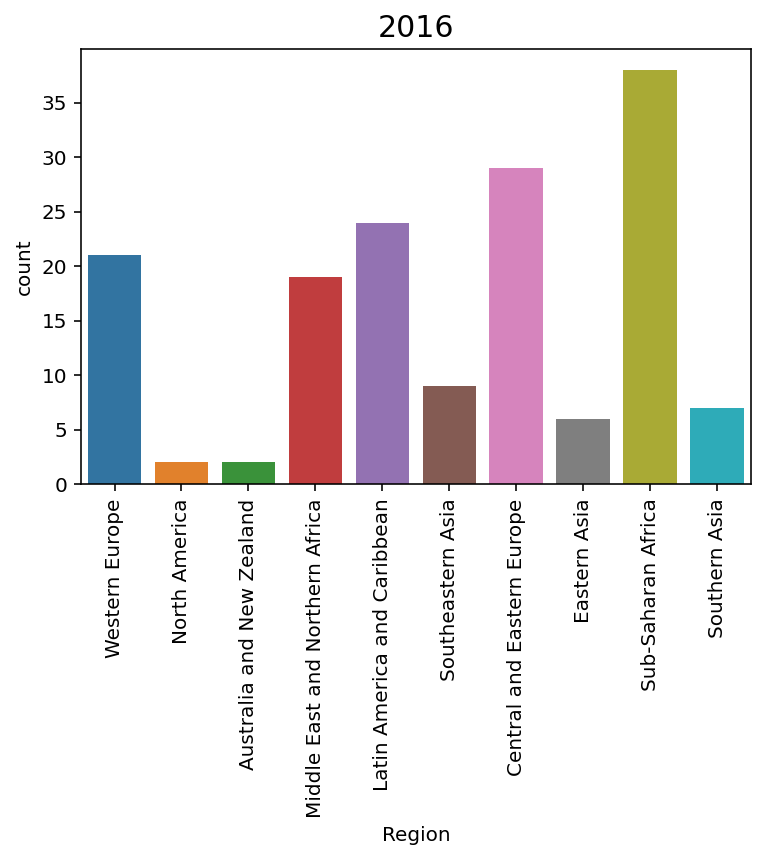

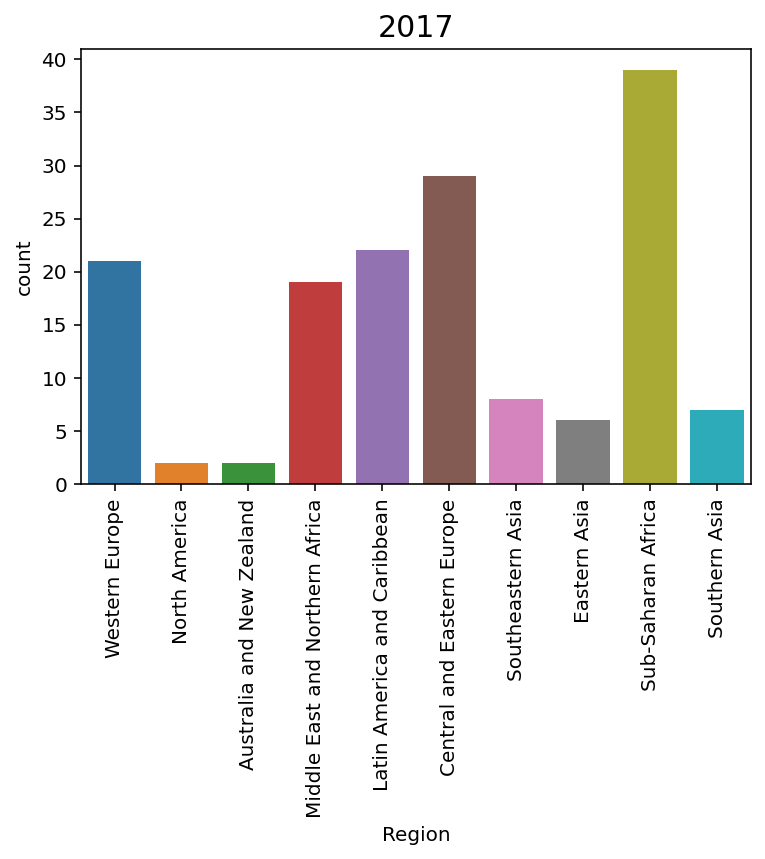

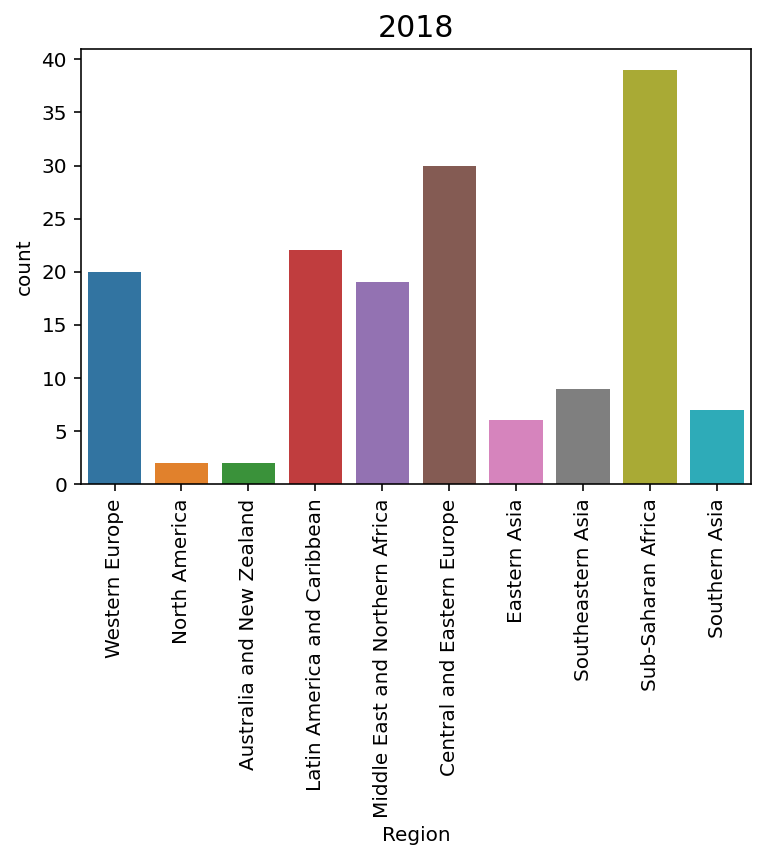

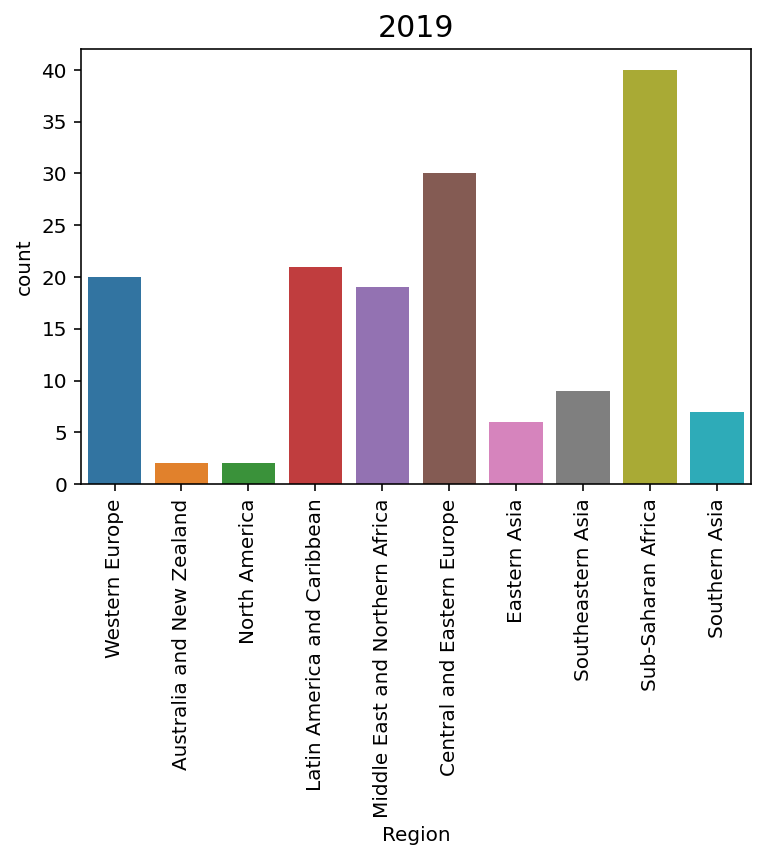

In [15]:
# Region별 국가수 시각화
# fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# count = 0
# datalist = [df_2015, df_2016, df_2017, df_2018, df_2019]
# for row in range(3):
#     for col in range(2):
#         if count == 5:
#             break
#         sns.countplot(x='Region', data=datalist[count], ax=ax[row][col])
#         ax[row][col].set_title(str(2015+count), fontsize=20)
# #        ax.tick_params(axis='both', labelrotation = 90)  # subplot 안에서 xticklabel 회전이 안됨
# #        plt.xticks(rotation=90)
# #        ax.tick_params(axis='x', rotation=90)
# #        ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#         count += 1

ax = sns.countplot(data=df_2015, x='Region')
ax.set_title(str(2015), fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

ax = sns.countplot(data=df_2016, x='Region')
ax.set_title(str(2016), fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

ax = sns.countplot(data=df_2017, x='Region')
ax.set_title(str(2017), fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

ax = sns.countplot(data=df_2018, x='Region')
ax.set_title(str(2018), fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

ax = sns.countplot(data=df_2019, x='Region')
ax.set_title(str(2019), fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### 각 Region별 행복지수 시각화

In [16]:
# df_Region에 Score_Sum, Score_Avg, Std_Error column 추가
df_Region2015.insert(2, 'Score_Sum', 0.0)
df_Region2015.insert(3, 'Score_Avg', 0.0)
df_Region2015.insert(4, 'Std_Error', 0.0)
print('2015', df_Region2015)
print()

df_Region2016.insert(2, 'Score_Sum', 0.0)
df_Region2016.insert(3, 'Score_Avg', 0.0)
df_Region2016.insert(4, 'Std_Error', 0.0)
print('2016', df_Region2016)
print()

df_Region2017.insert(2, 'Score_Sum', 0.0)
df_Region2017.insert(3, 'Score_Avg', 0.0)
df_Region2017.insert(4, 'Std_Error', 0.0)
print('2017', df_Region2017)
print()

df_Region2018.insert(2, 'Score_Sum', 0.0)
df_Region2018.insert(3, 'Score_Avg', 0.0)
df_Region2018.insert(4, 'Std_Error', 0.0)
print('2018', df_Region2018)
print()

df_Region2019.insert(2, 'Score_Sum', 0.0)
df_Region2019.insert(3, 'Score_Avg', 0.0)
df_Region2019.insert(4, 'Std_Error', 0.0)
print('2019', df_Region2019)

2015                             Region  count  Score_Sum  Score_Avg  Std_Error
0        Australia and New Zealand      2        0.0        0.0        0.0
1       Central and Eastern Europe     29        0.0        0.0        0.0
2                     Eastern Asia      6        0.0        0.0        0.0
3      Latin America and Caribbean     22        0.0        0.0        0.0
4  Middle East and Northern Africa     20        0.0        0.0        0.0
5                    North America      2        0.0        0.0        0.0
6                Southeastern Asia      9        0.0        0.0        0.0
7                    Southern Asia      7        0.0        0.0        0.0
8               Sub-Saharan Africa     40        0.0        0.0        0.0
9                   Western Europe     21        0.0        0.0        0.0

2016                             Region  count  Score_Sum  Score_Avg  Std_Error
0        Australia and New Zealand      2        0.0        0.0        0.0
1       Centra

In [17]:
# Errorbar chart를 그리기 위해서 Standard Error 구하기
Score_Region = {}
for i in range(len(df_2015)):
    for k in range(len(df_Region2015)):
        if df_2015['Region'][i] == df_Region2015['Region'][k]:
            r = df_2015['Region'][i]
            s = df_2015['Score'][i]
            if r in Score_Region:
                Score_Region[r].append(s)
            else:
                Score_Region[r] = [s]

for i in range(len(df_Region2015)):
    r = df_Region2015['Region'][i]
    df_Region2015['Std_Error'][i] = np.std(Score_Region[r], ddof=1) / np.sqrt(np.size(Score_Region[r]))
    
print('2015', df_Region2015)
print()


Score_Region = {}
for i in range(len(df_2016)):
    for k in range(len(df_Region2016)):
        if df_2016['Region'][i] == df_Region2016['Region'][k]:
            r = df_2016['Region'][i]
            s = df_2016['Score'][i]
            if r in Score_Region:
                Score_Region[r].append(s)
            else:
                Score_Region[r] = [s]

for i in range(len(df_Region2016)):
    r = df_Region2016['Region'][i]
    df_Region2016['Std_Error'][i] = np.std(Score_Region[r], ddof=1) / np.sqrt(np.size(Score_Region[r]))
    
print('2016', df_Region2016)
print()


Score_Region = {}
for i in range(len(df_2017)):
    for k in range(len(df_Region2017)):
        if df_2017['Region'][i] == df_Region2017['Region'][k]:
            r = df_2017['Region'][i]
            s = df_2017['Score'][i]
            if r in Score_Region:
                Score_Region[r].append(s)
            else:
                Score_Region[r] = [s]

for i in range(len(df_Region2017)):
    r = df_Region2017['Region'][i]
    df_Region2017['Std_Error'][i] = np.std(Score_Region[r], ddof=1) / np.sqrt(np.size(Score_Region[r]))
    
print('2017', df_Region2017)
print()


Score_Region = {}
for i in range(len(df_2018)):
    for k in range(len(df_Region2018)):
        if df_2018['Region'][i] == df_Region2018['Region'][k]:
            r = df_2018['Region'][i]
            s = df_2018['Score'][i]
            if r in Score_Region:
                Score_Region[r].append(s)
            else:
                Score_Region[r] = [s]

for i in range(len(df_Region2018)):
    r = df_Region2018['Region'][i]
    df_Region2018['Std_Error'][i] = np.std(Score_Region[r], ddof=1) / np.sqrt(np.size(Score_Region[r]))
    
print('2018', df_Region2018)
print()


Score_Region = {}
for i in range(len(df_2019)):
    for k in range(len(df_Region2019)):
        if df_2019['Region'][i] == df_Region2019['Region'][k]:
            r = df_2019['Region'][i]
            s = df_2019['Score'][i]
            if r in Score_Region:
                Score_Region[r].append(s)
            else:
                Score_Region[r] = [s]

for i in range(len(df_Region2019)):
    r = df_Region2019['Region'][i]
    df_Region2019['Std_Error'][i] = np.std(Score_Region[r], ddof=1) / np.sqrt(np.size(Score_Region[r]))
    
print('2019', df_Region2019)

2015                             Region  count  Score_Sum  Score_Avg  Std_Error
0        Australia and New Zealand      2        0.0        0.0   0.001000
1       Central and Eastern Europe     29        0.0        0.0   0.105929
2                     Eastern Asia      6        0.0        0.0   0.226191
3      Latin America and Caribbean     22        0.0        0.0   0.155330
4  Middle East and Northern Africa     20        0.0        0.0   0.246276
5                    North America      2        0.0        0.0   0.154000
6                Southeastern Asia      9        0.0        0.0   0.316673
7                    Southern Asia      7        0.0        0.0   0.215639
8               Sub-Saharan Africa     40        0.0        0.0   0.096379
9                   Western Europe     21        0.0        0.0   0.179939

2016                             Region  count  Score_Sum  Score_Avg  Std_Error
0        Australia and New Zealand      2        0.0        0.0   0.010500
1       Centra

2015                             Region  count  Score_Sum  Score_Avg  Std_Error
0        Australia and New Zealand      2     14.570   7.285000   0.001000
1       Central and Eastern Europe     29    154.655   5.332931   0.105929
2                     Eastern Asia      6     33.757   5.626167   0.226191
3      Latin America and Caribbean     22    135.183   6.144682   0.155330
4  Middle East and Northern Africa     20    108.138   5.406900   0.246276
5                    North America      2     14.546   7.273000   0.154000
6                Southeastern Asia      9     47.857   5.317444   0.316673
7                    Southern Asia      7     32.066   4.580857   0.215639
8               Sub-Saharan Africa     40    168.112   4.202800   0.096379
9                   Western Europe     21    140.482   6.689619   0.179939

2016                             Region  count  Score_Sum  Score_Avg  Std_Error
0        Australia and New Zealand      2     14.647   7.323500   0.010500
1       Centra

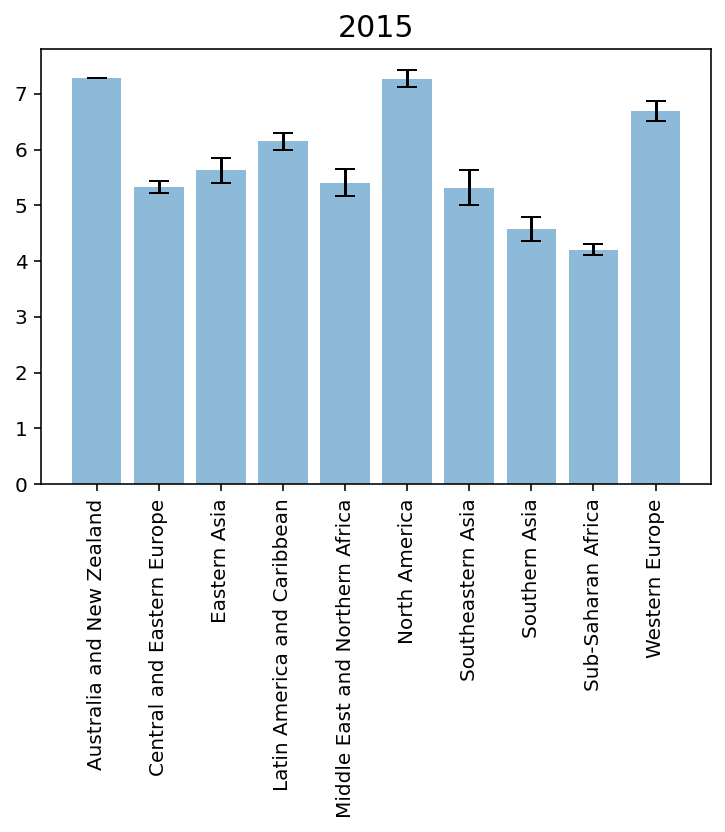

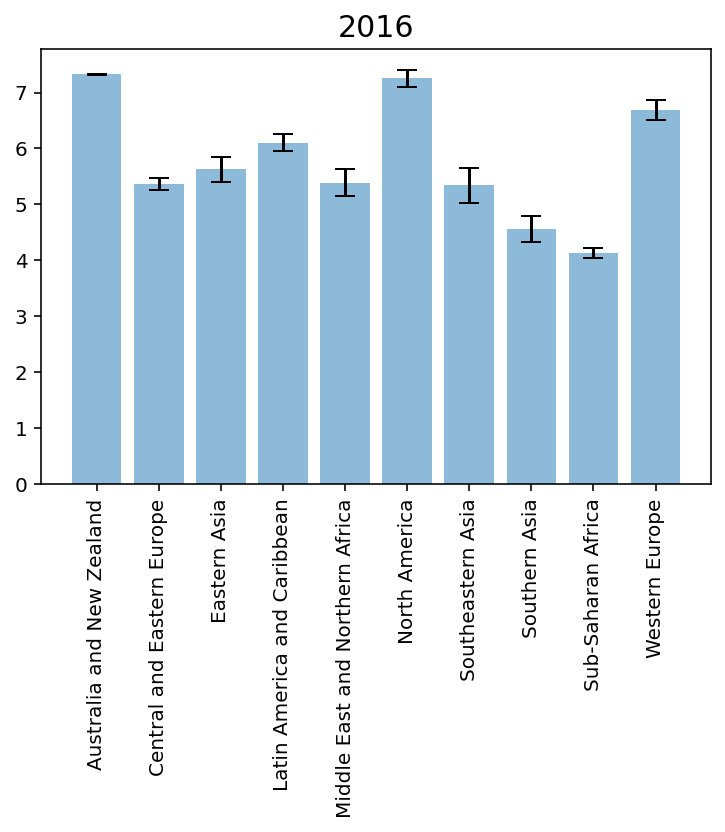

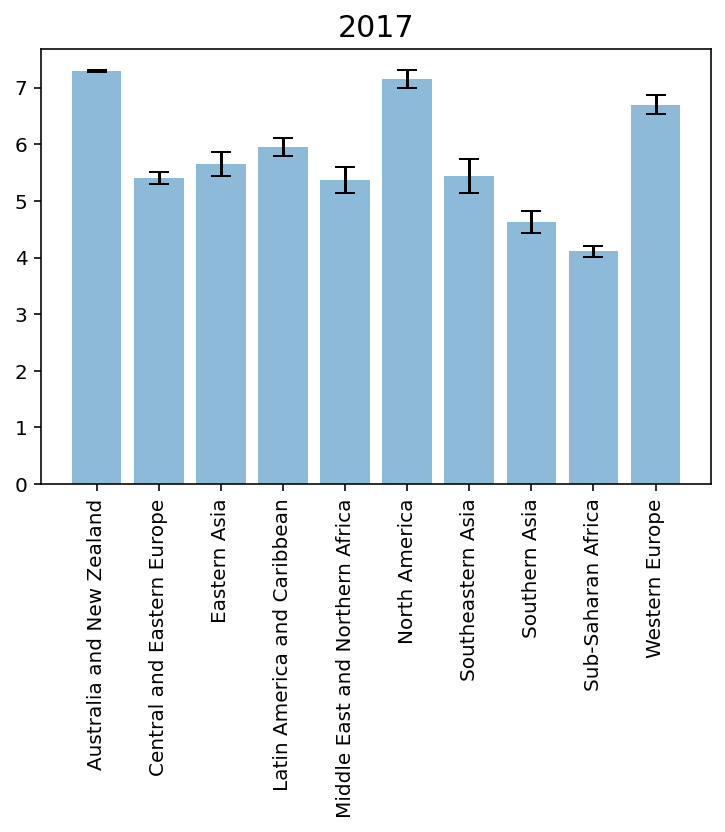

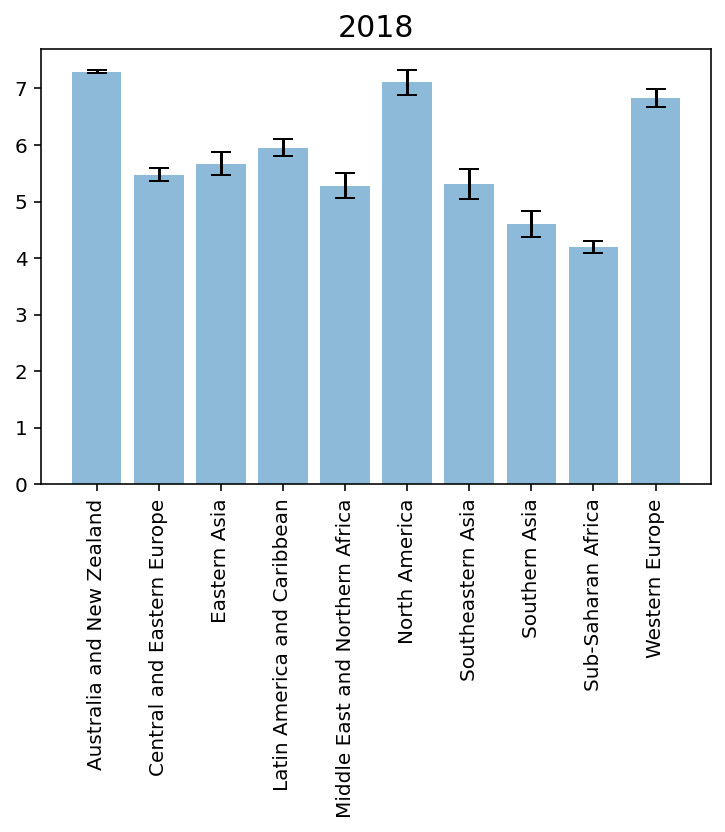

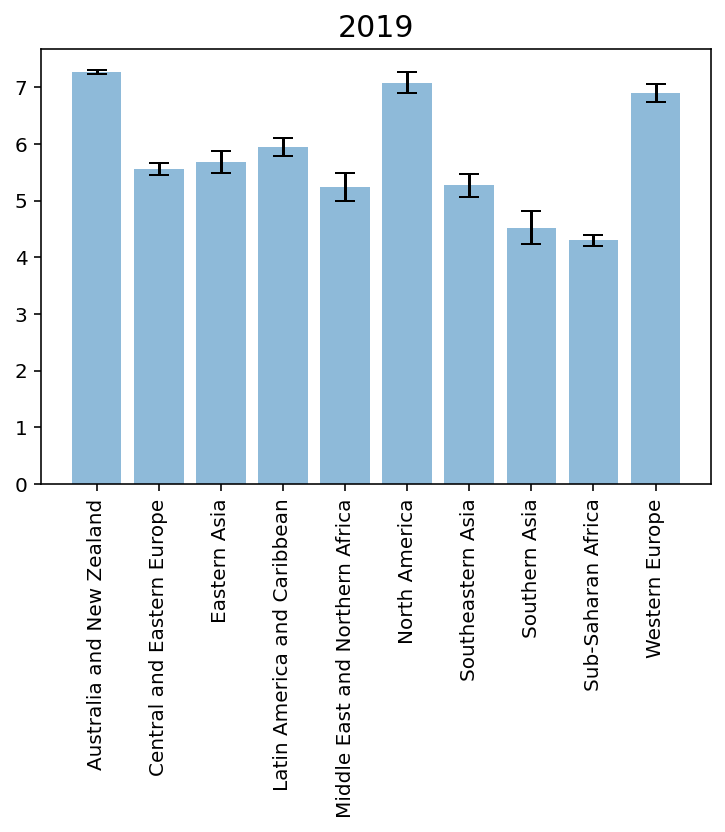

In [18]:
# 각 Region별 행복지수 평균값 구하기
for i in range(len(df_2015)):
    for k in range(len(df_Region2015)):
        if df_2015['Region'][i] == df_Region2015['Region'][k]:
            df_Region2015['Score_Sum'][k] += df_2015['Score'][i]

for i in range(len(df_2016)):
    for k in range(len(df_Region2016)):
        if df_2016['Region'][i] == df_Region2016['Region'][k]:
            df_Region2016['Score_Sum'][k] += df_2016['Score'][i]

for i in range(len(df_2017)):
    for k in range(len(df_Region2017)):
        if df_2017['Region'][i] == df_Region2017['Region'][k]:
            df_Region2017['Score_Sum'][k] += df_2017['Score'][i]

for i in range(len(df_2018)):
    for k in range(len(df_Region2018)):
        if df_2018['Region'][i] == df_Region2018['Region'][k]:
            df_Region2018['Score_Sum'][k] += df_2018['Score'][i]

for i in range(len(df_2019)):
    for k in range(len(df_Region2019)):
        if df_2019['Region'][i] == df_Region2019['Region'][k]:
            df_Region2019['Score_Sum'][k] += df_2019['Score'][i]


for i in range(len(df_Region2015)):
    df_Region2015['Score_Avg'][i] = df_Region2015['Score_Sum'][i] / df_Region2015['count'][i]
print('2015', df_Region2015)
print()

for i in range(len(df_Region2016)):
    df_Region2016['Score_Avg'][i] = df_Region2016['Score_Sum'][i] / df_Region2016['count'][i]
print('2016', df_Region2016)
print()

for i in range(len(df_Region2017)):
    df_Region2017['Score_Avg'][i] = df_Region2017['Score_Sum'][i] / df_Region2017['count'][i]
print('2017', df_Region2017)
print()

for i in range(len(df_Region2018)):
    df_Region2018['Score_Avg'][i] = df_Region2018['Score_Sum'][i] / df_Region2018['count'][i]
print('2018', df_Region2018)
print()

for i in range(len(df_Region2019)):
    df_Region2019['Score_Avg'][i] = df_Region2019['Score_Sum'][i] / df_Region2019['count'][i]
print('2019', df_Region2019)
print()

x = df_Region2015['Region']
y = df_Region2015['Score_Avg']
y_error = df_Region2015['Std_Error']
plt.bar(x, y, yerr=y_error, align='center', alpha=0.5, ecolor='black', capsize=5)
plt.title(str(2015), fontsize=15)
plt.xticks(rotation=90)
plt.show()

x = df_Region2016['Region']
y = df_Region2016['Score_Avg']
y_error = df_Region2016['Std_Error']
plt.bar(x, y, yerr=y_error, align='center', alpha=0.5, ecolor='black', capsize=5)
plt.title(str(2016), fontsize=15)
plt.xticks(rotation=90)
plt.show()

x = df_Region2017['Region']
y = df_Region2017['Score_Avg']
y_error = df_Region2017['Std_Error']
plt.bar(x, y, yerr=y_error, align='center', alpha=0.5, ecolor='black', capsize=5)
plt.title(str(2017), fontsize=15)
plt.xticks(rotation=90)
plt.show()

x = df_Region2018['Region']
y = df_Region2018['Score_Avg']
y_error = df_Region2018['Std_Error']
plt.bar(x, y, yerr=y_error, align='center', alpha=0.5, ecolor='black', capsize=5)
plt.title(str(2018), fontsize=15)
plt.xticks(rotation=90)
plt.show()

x = df_Region2019['Region']
y = df_Region2019['Score_Avg']
y_error = df_Region2019['Std_Error']
plt.bar(x, y, yerr=y_error, align='center', alpha=0.5, ecolor='black', capsize=5)
plt.title(str(2019), fontsize=15)
plt.xticks(rotation=90)
plt.show()

### 각 대륙의 연도별 행복지수 변화를 시각화

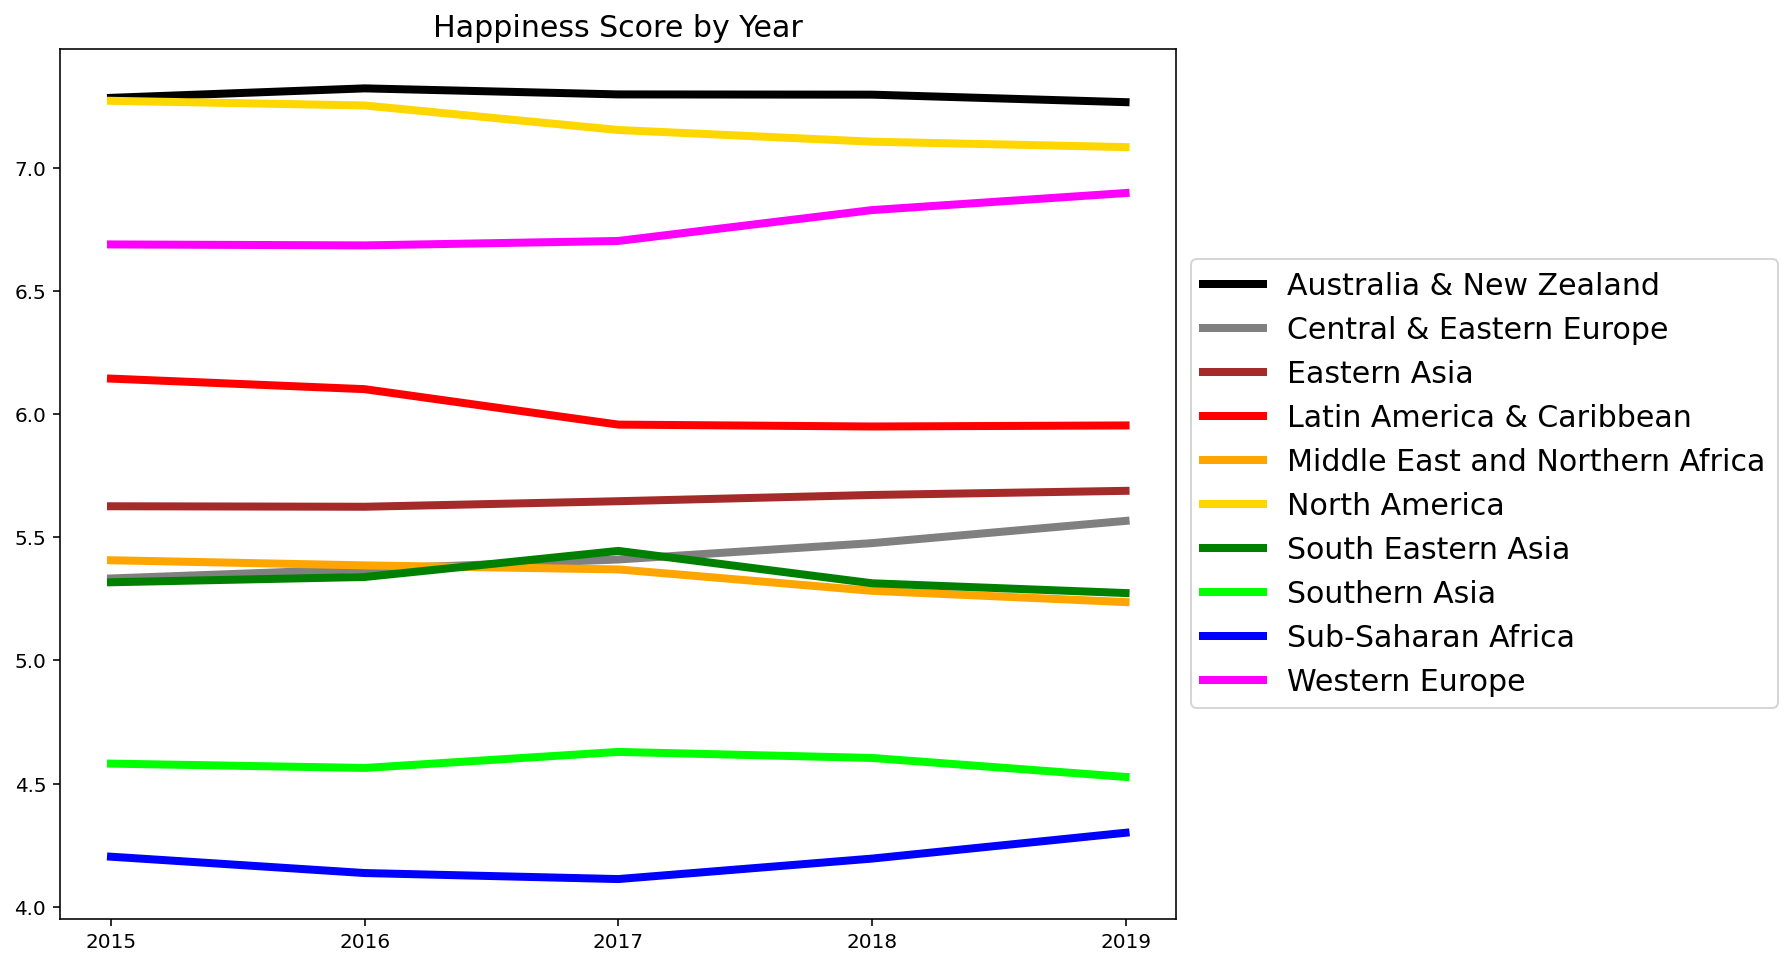

In [19]:
list_year = ['2015', '2016', '2017', '2018', '2019']
AusNZ = [df_Region2015['Score_Avg'][0], df_Region2016['Score_Avg'][0], df_Region2017['Score_Avg'][0],
         df_Region2018['Score_Avg'][0], df_Region2019['Score_Avg'][0]]
CEEu = [df_Region2015['Score_Avg'][1], df_Region2016['Score_Avg'][1], df_Region2017['Score_Avg'][1],
        df_Region2018['Score_Avg'][1], df_Region2019['Score_Avg'][1]]
EAsia = [df_Region2015['Score_Avg'][2], df_Region2016['Score_Avg'][2], df_Region2017['Score_Avg'][2],
        df_Region2018['Score_Avg'][2], df_Region2019['Score_Avg'][2]]
LACar = [df_Region2015['Score_Avg'][3], df_Region2016['Score_Avg'][3], df_Region2017['Score_Avg'][3],
        df_Region2018['Score_Avg'][3], df_Region2019['Score_Avg'][3]]
MENAf = [df_Region2015['Score_Avg'][4], df_Region2016['Score_Avg'][4], df_Region2017['Score_Avg'][4],
        df_Region2018['Score_Avg'][4], df_Region2019['Score_Avg'][4]]
NAmr = [df_Region2015['Score_Avg'][5], df_Region2016['Score_Avg'][5], df_Region2017['Score_Avg'][5],
        df_Region2018['Score_Avg'][5], df_Region2019['Score_Avg'][5]]
SEAsia = [df_Region2015['Score_Avg'][6], df_Region2016['Score_Avg'][6], df_Region2017['Score_Avg'][6],
        df_Region2018['Score_Avg'][6], df_Region2019['Score_Avg'][6]]
SAsia = [df_Region2015['Score_Avg'][7], df_Region2016['Score_Avg'][7], df_Region2017['Score_Avg'][7],
        df_Region2018['Score_Avg'][7], df_Region2019['Score_Avg'][7]]
SSAf = [df_Region2015['Score_Avg'][8], df_Region2016['Score_Avg'][8], df_Region2017['Score_Avg'][8],
        df_Region2018['Score_Avg'][8], df_Region2019['Score_Avg'][8]]
WEu = [df_Region2015['Score_Avg'][9], df_Region2016['Score_Avg'][9], df_Region2017['Score_Avg'][9],
        df_Region2018['Score_Avg'][9], df_Region2019['Score_Avg'][9]]

plt.figure(figsize=(10,8))
plt.plot(list_year, AusNZ, color='black', linewidth=4, label='Australia & New Zealand')
plt.plot(list_year, CEEu, color='gray', linewidth=4, label='Central & Eastern Europe')
plt.plot(list_year, EAsia, color='brown', linewidth=4, label='Eastern Asia')
plt.plot(list_year, LACar, color='red', linewidth=4, label='Latin America & Caribbean')
plt.plot(list_year, MENAf, color='orange', linewidth=4, label='Middle East and Northern Africa')
plt.plot(list_year, NAmr, color='gold', linewidth=4, label='North America')
plt.plot(list_year, SEAsia, color='green', linewidth=4, label='South Eastern Asia')
plt.plot(list_year, SAsia, color='lime', linewidth=4, label='Southern Asia')
plt.plot(list_year, SSAf, color='blue', linewidth=4, label='Sub-Saharan Africa')
plt.plot(list_year, WEu, color='magenta', linewidth=4, label='Western Europe')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.title('Happiness Score by Year', fontsize=15)
plt.show()
